In [1]:
import os

import matplotlib.pyplot as plt
import json
import random

random.seed(0)

In [2]:
test_dirs = {}
train_dirs = {}

In [3]:
root_dir = "full_data"
dir_names = os.listdir(root_dir)

dir_dict = {}
for dir_name in dir_names:
    dir_dict[dir_name] = [
        img_name.split(".")[0] for img_name in os.listdir(os.path.join(root_dir, dir_name)) \
        if img_name.split(".")[-1] == "jpg"
    ]

print(f"Кол-во директорий: {len(dir_dict)}")
num_of_elements = 0
for s in dir_dict.keys():
    print(s, ":", len(dir_dict[s]))
    num_of_elements += len(dir_dict[s])

print(f"Общее кол-во картинок:{num_of_elements}")

Кол-во директорий: 211
kenguru_Школьная одежда___Водолазки : 8
kenguru_Футболки_майки_поло_топы___Топы : 170
kenguru_Школьная одежда___Платья_сарафаны : 22
kenguru_Ремни : 53
kenguru_Брюки___Бананы : 2
kenguru_Украшения___Подвески и кулоны : 27
kenguru_Головные уборы___Панамы : 219
kenguru_Спортивная одежда___Леггинсы : 1
puma_Сумки_рюкзаки и чемоданы___Мягкая сумка дафл (duffle bag) : 2
kenguru_Юбки : 177
kenguru_Футболки_майки_поло_топы : 11
kenguru_Костюмы_пиджаки___Костюмы : 12
kenguru_Домашняя одежда и бельё___Пижамы : 1
kenguru_Брюки___Кожаные : 2
kenguru_Джемперы_свитеры_кардиганы_кофты___Джемперы : 172
kenguru_Платья_сарафаны : 931
kenguru_Обувь___Мокасины : 8
kenguru_Школьная одежда___Брюки : 35
puma_Верхняя одежда___Жилеты (верхняя одежда) : 11
puma_Верхняя одежда___Бомберы : 18
puma_Шорты_бриджи : 6
kenguru_Верхняя одежда___Пуховики : 187
kenguru_Сумки_рюкзаки и чемоданы___Сумки через плечо : 127
kenguru_Домашняя одежда и бельё___Колготки : 278
kenguru_Верхняя одежда___Шубы 

Отрисуем размеры директорий.

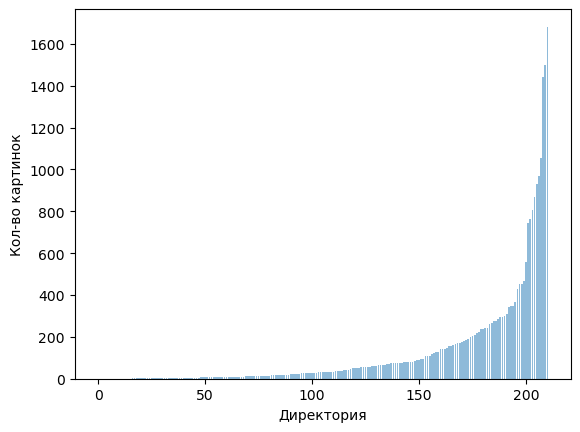

In [4]:
plt.bar(range(len(dir_dict)), sorted([len(i) for i in dir_dict.values()]), align='center', alpha=0.5)
plt.ylabel("Кол-во картинок")
plt.xlabel("Директория")
plt.show()

In [5]:
small_types = []
num_of_elements = 0
for s in dir_dict.keys():
    if len(dir_dict[s]) < 25:
        print(s, ":", len(dir_dict[s]))
        num_of_elements += len(dir_dict[s])
        small_types.append(s)

        
for i in small_types:
    test_dirs[i] = dir_dict[i]

print(f"Суммарное кол-во картинок в маленьких директориях: {num_of_elements}")

kenguru_Школьная одежда___Водолазки : 8
kenguru_Школьная одежда___Платья_сарафаны : 22
kenguru_Брюки___Бананы : 2
kenguru_Спортивная одежда___Леггинсы : 1
puma_Сумки_рюкзаки и чемоданы___Мягкая сумка дафл (duffle bag) : 2
kenguru_Футболки_майки_поло_топы : 11
kenguru_Костюмы_пиджаки___Костюмы : 12
kenguru_Домашняя одежда и бельё___Пижамы : 1
kenguru_Брюки___Кожаные : 2
kenguru_Обувь___Мокасины : 8
puma_Верхняя одежда___Жилеты (верхняя одежда) : 11
puma_Верхняя одежда___Бомберы : 18
puma_Шорты_бриджи : 6
kenguru_Пляжная одежда : 11
puma_Сумки_рюкзаки и чемоданы___Кроссбоди сумка : 9
kenguru_Головные уборы___Кепки : 13
puma_Верхняя одежда___Пальто : 6
kenguru_Блузки_рубашки___Джинсовые рубашки : 11
kenguru_Головные уборы___Береты : 8
kenguru_Юбки___Ассиметричная : 1
kenguru_Верхняя одежда___Дубленки : 2
puma_Головные уборы : 5
kenguru_Брюки___Прямые : 10
kenguru_Юбки___Миди : 2
kenguru_Разное : 1
kenguru_Школьная одежда___Костюмы : 5
kenguru_Платья_сарафаны___Туники : 1
kenguru_Домашняя 

In [6]:
percent = 0.3
max_num_imgs = 100

big_types = [i for i in dir_dict.keys() if i not in small_types]

for dir_name in big_types:
    dir_list = dir_dict[dir_name]
    num_test_samples = min(int(percent * len(dir_list)), max_num_imgs)
    test_list = random.sample(dir_list, num_test_samples)
    train_list = [i for i in dir_list if i not in test_list]
    
    test_dirs[dir_name] = test_list
    train_dirs[dir_name] = train_list

In [7]:
train_size = sum([len(i) for i in train_dirs.values()])
print(f"Кол-во картинок в тренировочном датасете: {train_size}")

Кол-во картинок в тренировочном датасете: 20250


In [8]:
test_size = sum([len(i) for i in test_dirs.values()])
print(f"Кол-во картинок в тестовом датасете: {test_size}")


Кол-во картинок в тестовом датасете: 5843


In [9]:
print(f"Пропорция: {test_size/train_size}")

Пропорция: 0.2885432098765432


<BarContainer object of 116 artists>

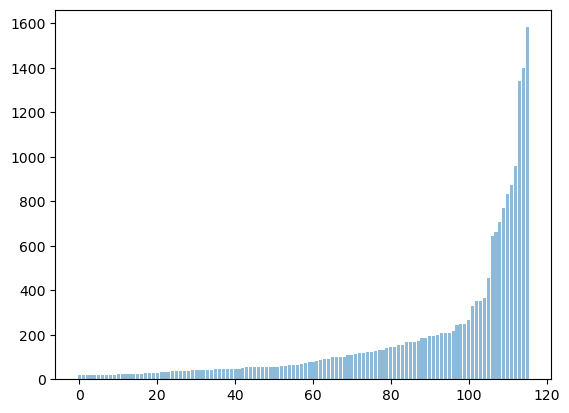

In [10]:
plt.bar(
    range(len(train_dirs)), 
    sorted([len(i) for i in train_dirs.values()]), align='center', alpha=0.5
)

<BarContainer object of 211 artists>

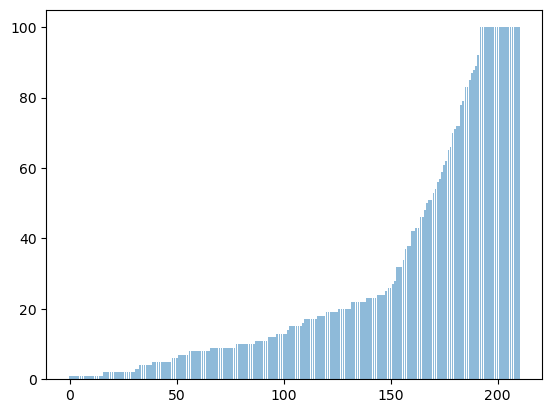

In [11]:
plt.bar(
    range(len(test_dirs)), 
    sorted([len(i) for i in test_dirs.values()]), align='center', alpha=0.5
)

In [12]:
dataset_json = {
    "root_dir": root_dir,
    "datasets": {
        "train": train_dirs,
        "test": test_dirs
    }
}


with open("datasets.json", "w") as f:
    json.dump(dataset_json, f, indent=4)